In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt

In [ ]:
#Ok first let's play around with some of the data we can access
#How do we access it?


In [11]:
#so we use endpoints. endpoints are basically api access points to gather data we want. there are various endpoints for just about any stat you can think of. Say we want to see the league leadres in points 
#we specify that we want an endpoint. After that we specify which endpoint we want which is league leaders.
data = endpoints.leagueleaders.LeagueLeaders() 
league_leaders_df = data.league_leaders.get_data_frame()   
#we can convert this data into a data frame

In [12]:
data = endpoints.assistleaders.AssistLeaders()
assist_leaders_df = data.assist_leaders.get_data_frame()

In [13]:
assist_leaders_df

,RANK,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,AST
0,1,1610612766,CHA,Charlotte Hornets,2268
1,2,1610612743,DEN,Denver Nuggets,2246
2,3,1610612759,SAS,San Antonio Spurs,2244
3,4,1610612756,PHX,Phoenix Suns,2217
4,5,1610612744,GSW,Golden State Warriors,2167


Let's just play around and see what stats you guys are interested in!

In [ ]:
#

In [56]:
league_leaders_df

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1629027,1,Trae Young,ATL,75,2618,701,1524,0.460,229,...,279,726,72,7,298,124,2127,2037,2.44,0.24
1,201942,2,DeMar DeRozan,CHI,76,2743,774,1535,0.504,50,...,392,374,68,24,181,178,2118,1961,2.07,0.38
2,203954,3,Joel Embiid,PHI,67,2259,652,1317,0.495,91,...,776,280,75,98,209,177,2038,2248,1.34,0.36
3,1628369,4,Jayson Tatum,BOS,75,2705,697,1550,0.450,224,...,600,331,74,49,212,172,2015,1935,1.56,0.35
4,203999,5,Nikola Jokic,DEN,74,2476,764,1311,0.583,97,...,1019,584,109,63,281,191,2004,2862,2.08,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,1630207,580,Nate Hinton,IND,2,2,0,1,0.000,0,...,0,0,0,0,1,0,0,-2,0.00,0.00
599,1626155,580,Sam Dekker,TOR,1,1,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0.00,0.00
600,1629309,580,Trayvon Palmer,DET,1,17,0,1,0.000,0,...,2,0,0,0,1,2,0,0,0.00,0.00
601,1629788,580,Tyler Hall,NYK,1,2,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0.00,0.00


In [16]:
#Suppose we want to find out the relationship between shot attempts and points scored.
#We can do this by creating a simple linear regression model
#the data presented to us though gives us total points scored and we want point per game averages 
#let's compute the points per game average 
x, y = league_leaders_df.FGA/league_leaders_df.GP, league_leaders_df.PTS/league_leaders_df.GP 

In [18]:
type(x)

pandas.core.series.Series

In [19]:
x

0      20.320000
1      20.197368
2      19.656716
3      20.666667
4      17.716216
         ...    
598     0.500000
599     0.000000
600     1.000000
601     0.000000
602     3.000000
Length: 603, dtype: float64

[21.80357143]


In [ ]:
#what happened is that our data frame divided all each player's points by the games he played
#we can verify this by looking at our original data frame


In [20]:
league_leaders_df

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1629027,1,Trae Young,ATL,75,2618,701,1524,0.460,229,...,279,726,72,7,298,124,2127,2037,2.44,0.24
1,201942,2,DeMar DeRozan,CHI,76,2743,774,1535,0.504,50,...,392,374,68,24,181,178,2118,1961,2.07,0.38
2,203954,3,Joel Embiid,PHI,67,2259,652,1317,0.495,91,...,776,280,75,98,209,177,2038,2248,1.34,0.36
3,1628369,4,Jayson Tatum,BOS,75,2705,697,1550,0.450,224,...,600,331,74,49,212,172,2015,1935,1.56,0.35
4,203999,5,Nikola Jokic,DEN,74,2476,764,1311,0.583,97,...,1019,584,109,63,281,191,2004,2862,2.08,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,1630207,580,Nate Hinton,IND,2,2,0,1,0.000,0,...,0,0,0,0,1,0,0,-2,0.00,0.00
599,1626155,580,Sam Dekker,TOR,1,1,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0.00,0.00
600,1629309,580,Trayvon Palmer,DET,1,17,0,1,0.000,0,...,2,0,0,0,1,2,0,0,0.00,0.00
601,1629788,580,Tyler Hall,NYK,1,2,0,0,0.000,0,...,0,0,0,0,0,0,0,0,0.00,0.00


Trae attempted 1524 shots over the course of 75 games which equals 20.32 attempts per game


In [46]:
most_points = league_leaders_df["PTS"].max()

In [47]:
most_field_goals = league_leaders_df["FGA"].max()

In [48]:
most_points

2127

In [49]:
most_field_goals

1550

For our linear regression model we want to test the relationship between between two variables, one being our independent variable and the other being our dependent variable. our independent is shot attempts and our dependent is the points per game averge

In order to proceed with our modeling we have to reshape the array into a 2d one for input 

In [24]:
x = np.array(x).reshape(-1,1) 
y = np.array(y).reshape(-1,1)

Now we can start to fit our model with our data. Luckily this is fairly simplistic since python has amazing libraries to do all of this stuff for us. 

In [94]:
def linear_regression_model_plot(a,b,x_axis,y_axis):
    #here's how we create our empty model 
    model = linear_model.LinearRegression()
    #we fit it with our variables 
    model.fit(a,b)
    #the relationship will be measured with a line of fit or R^2 so let's get that 
    r2 = round(model.score(a,b), 2)  
    predicted_y = model.predict(a)             # Get our predicted y values for x
    # Scatterplot:  Specfiy size(s) and transparency(alpha) of dots
    plt.scatter(a, b, s=15, alpha=.5) 
    # line: Add line for regression line w/ predicted values
    plt.plot(a, predicted_y, color = 'black') 
    # Give it a title
    plt.title(f"NBA Relationship Between {x_axis} and {y_axis}")
    # Label x-axis
    plt.xlabel(x_axis)
    # Label y-axis
    plt.ylabel(y_axis)  
    # 10, 25 are the coordinates for our text. Adjust accordingly
    plt.text(10,25, f'R2={r2}') 
    #obviously trae young is a beast offensively so he's an outlier. we can actually annotate him
    plt.annotate(df.PLAYER[0],                       # This the name of the top scoring player. Refer to the .head() from earlier
             (a[0], b[0]),                       # This is the point we want to annotate.  
             (a[0]-7,b[0]-2),                    # These are coords for the text
             arrowprops=dict(arrowstyle='-'))    # Here we use a flat line for the arrow '-'



We have our Model. Now we need to visualize it in a way that is understandable and we can do that with matplotlib  

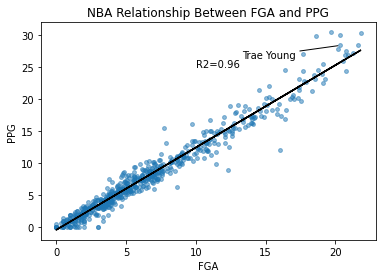

In [99]:
 linear_regression_model_plot(x,y,"FGA","PPG")







lets create the same model but with 3 point attempts instead of field goal attempts 

In [100]:
league_leaders_df.columns

Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF',
       'AST_TOV', 'STL_TOV'],
      dtype='object')

In [101]:
c = league_leaders_df.FG3A/league_leaders_df.GP, 
d= league_leaders_df.PTS/league_leaders_df.GP 

In [102]:
c = np.array(c).reshape(-1,1) 
d = np.array(d).reshape(-1,1)

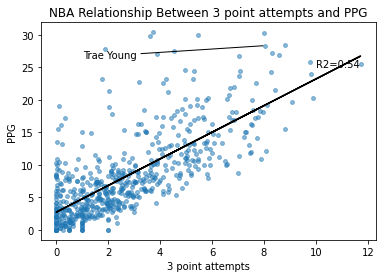

In [103]:
linear_regression_model_plot(c,d,"3 point attempts", "PPG")

Here R2 is .54 so there is a positive correlation between 3 point attempts and PPG but it doens't fit the data as well as our previous model 

Ok let's do one more model with assist !

In [104]:
league_leaders_df.columns

Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF',
       'AST_TOV', 'STL_TOV'],
      dtype='object')

In [109]:
f = league_leaders_df.AST/league_leaders_df.GP, 
g= league_leaders_df.PTS/league_leaders_df.GP 

In [110]:
f = np.array(f).reshape(-1,1) 
g = np.array(g).reshape(-1,1)

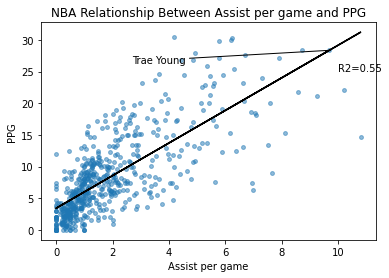

In [111]:
linear_regression_model_plot(f,g,"Assist per game", "PPG")

So shockingly enough if you're more likely to score more if you pass rather than shoot a 3??
Well this model may have be inaccurate for the best scores in todays game are the best facilitators